In [8]:
import torch,numpy as np,pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140,sci_mode=False,edgeitems=7)
pd.set_option('display.width',140)

In [9]:
#Cleaning the data

df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
modes=df.mode().iloc[0]
modes

,0
PassengerId,1
Survived,0.0
Pclass,3.0
Name,"Abbing, Mr. Anthony"
Sex,male
Age,24.0
SibSp,0.0
Parch,0.0
Ticket,1601
Fare,8.05


In [12]:
df.fillna(modes,inplace=True)

In [13]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
import numpy as np
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


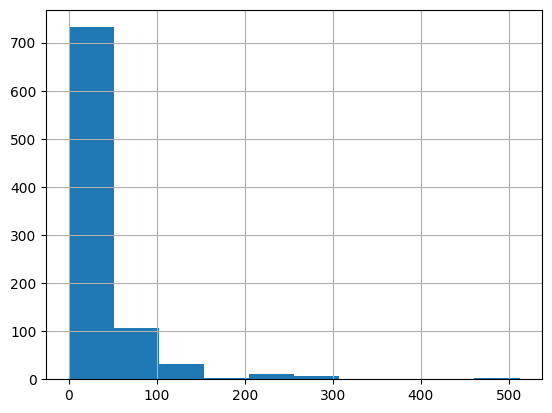

In [15]:
df['Fare'].hist();

In [16]:
df['LogFare']=np.log(df['Fare']+1)

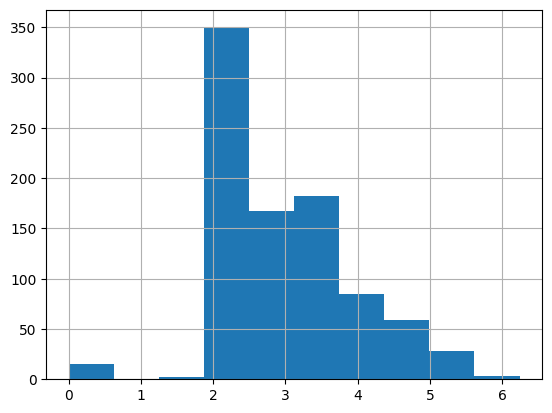

In [17]:
df['LogFare'].hist();

In [18]:
pclasses=sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [19]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [20]:
df=pd.get_dummies(df,columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [21]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,True,False,False,False,True,False,False,True
1,False,True,True,False,False,True,False,False
2,False,True,False,False,True,False,False,True
3,False,True,True,False,False,False,False,True
4,True,False,False,False,True,False,False,True


In [22]:
from torch import tensor
t_dep=tensor(df.Survived)


In [24]:
indep_cols=['Age','SibSp','Parch','LogFare']+added_cols
t_indep=tensor(df[indep_cols].values.astype(np.float32))
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [25]:
t_indep.shape

torch.Size([891, 12])

In [26]:
#Setting up a linear model
torch.manual_seed(42)

n_coeff=t_indep.shape[1]
coeffs=torch.rand(n_coeff)-0.5
coeffs


tensor([ 0.3823,  0.4150, -0.1171,  0.4593, -0.1096,  0.1009, -0.2434,  0.2936,  0.4408, -0.3668,  0.4346,  0.0936])

In [27]:
t_indep*coeffs

tensor([[ 8.4099,  0.4150, -0.0000,  0.9692, -0.1096,  0.0000, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [14.5262,  0.4150, -0.0000,  1.9661, -0.0000,  0.1009, -0.2434,  0.0000,  0.0000, -0.3668,  0.0000,  0.0000],
        [ 9.9390,  0.0000, -0.0000,  1.0054, -0.0000,  0.1009, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [13.3794,  0.4150, -0.0000,  1.8330, -0.0000,  0.1009, -0.2434,  0.0000,  0.0000, -0.0000,  0.0000,  0.0936],
        [13.3794,  0.0000, -0.0000,  1.0117, -0.1096,  0.0000, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 9.1745,  0.0000, -0.0000,  1.0320, -0.1096,  0.0000, -0.0000,  0.0000,  0.4408, -0.0000,  0.4346,  0.0000],
        [20.6425,  0.0000, -0.0000,  1.8224, -0.1096,  0.0000, -0.2434,  0.0000,  0.0000, -0.0000,  0.0000,  0.0936],
        ...,
        [ 9.5567,  0.0000, -0.0000,  0.9580, -0.1096,  0.0000, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [14.9085,  0.0000, -0.5857,  1.5641

In [28]:
vals,indices=t_indep.max(dim=0)
t_indep=t_indep/vals

In [29]:
t_indep*coeffs

tensor([[ 0.1051,  0.0519, -0.0000,  0.1553, -0.1096,  0.0000, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.1816,  0.0519, -0.0000,  0.3150, -0.0000,  0.1009, -0.2434,  0.0000,  0.0000, -0.3668,  0.0000,  0.0000],
        [ 0.1242,  0.0000, -0.0000,  0.1611, -0.0000,  0.1009, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.1672,  0.0519, -0.0000,  0.2937, -0.0000,  0.1009, -0.2434,  0.0000,  0.0000, -0.0000,  0.0000,  0.0936],
        [ 0.1672,  0.0000, -0.0000,  0.1621, -0.1096,  0.0000, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.1147,  0.0000, -0.0000,  0.1654, -0.1096,  0.0000, -0.0000,  0.0000,  0.4408, -0.0000,  0.4346,  0.0000],
        [ 0.2580,  0.0000, -0.0000,  0.2920, -0.1096,  0.0000, -0.2434,  0.0000,  0.0000, -0.0000,  0.0000,  0.0936],
        ...,
        [ 0.1195,  0.0000, -0.0000,  0.1535, -0.1096,  0.0000, -0.0000,  0.0000,  0.4408, -0.0000,  0.0000,  0.0936],
        [ 0.1864,  0.0000, -0.0976,  0.2506

In [30]:
t_indep=t_indep/vals

In [31]:
preds=(t_indep*coeffs).sum(axis=1)

In [32]:
preds[:10]

tensor([ 0.4575, -0.4501,  0.6626,  0.0067,  0.4529,  0.7937, -0.2094,  0.4776,  0.6598,  0.0756])

In [33]:
loss=torch.abs(preds-t_dep).mean()
loss

tensor(0.5763)

In [34]:
def calc_preds(coeffs,indeps):
  return (indeps*coeffs).sum(axis=1)

def calc_loss(coeffs,indeps,deps):
  return torch.abs(calc_preds(coeffs,indeps)-deps).mean()

In [35]:
coeffs.requires_grad_()

tensor([ 0.3823,  0.4150, -0.1171,  0.4593, -0.1096,  0.1009, -0.2434,  0.2936,  0.4408, -0.3668,  0.4346,  0.0936], requires_grad=True)

In [36]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss

tensor(0.5763, grad_fn=<MeanBackward0>)

In [37]:
loss.backward()

In [38]:
coeffs.grad

tensor([    -0.0001,      0.0018,     -0.0009,     -0.0085,      0.1493,     -0.1190,     -0.2357,     -0.0067,      0.2727,     -0.1616,
             0.0730,      0.1190])

In [39]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss.backward()
coeffs.grad

tensor([    -0.0002,      0.0036,     -0.0017,     -0.0169,      0.2985,     -0.2379,     -0.4714,     -0.0135,      0.5455,     -0.3232,
             0.1459,      0.2379])

In [42]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss.backward()
with torch.no_grad():
  coeffs.sub_(coeffs.grad*0.1)
  coeffs.grad.zero_()
  print(calc_loss(coeffs,t_indep,t_dep))

tensor(0.5166)


In [45]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [46]:
trn_indep,val_indep=t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep=t_dep[trn_split],t_dep[trn_split]
len(trn_indep),len(val_indep)

(713, 178)

In [47]:
def update_coeffs(coeffs,lr):
  coeffs.sub_(coeffs.grad*lr)
  coeffs.grad.zero_()

In [48]:
def one_epoch(coeffs,lr):
  loss=calc_loss(coeffs,trn_indep,trn_dep)
  loss.backward()
  with torch.no_grad():update_coeffs(coeffs,lr)
  print(f"{loss:.3f}",end=";")

In [49]:
def init_coeffs():
  return (torch.rand(n_coeff)-0.5).requires_grad_()

In [50]:
def train_model(epochs=30,lr=0.01):
  torch.manual_seed(442)
  coeffs=init_coeffs()
  for i in range(epochs): one_epoch(coeffs,lr=lr)
  return coeffs

In [51]:
coeffs=train_model(18,lr=0.2)

0.539;0.492;0.444;0.419;0.426;0.379;0.386;0.367;0.340;0.358;0.311;0.354;0.329;0.301;0.323;0.283;0.304;0.285;

In [53]:
def show_coeffs():
  return dict(zip(indep_cols,coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.4620),
 'SibSp': tensor(0.1377),
 'Parch': tensor(0.2451),
 'LogFare': tensor(-0.1862),
 'Sex_male': tensor(-0.4198),
 'Sex_female': tensor(0.2177),
 'Pclass_1': tensor(0.6980),
 'Pclass_2': tensor(0.3781),
 'Pclass_3': tensor(0.3809),
 'Embarked_C': tensor(0.0702),
 'Embarked_Q': tensor(0.2114),
 'Embarked_S': tensor(0.2279)}

In [54]:
preds=calc_preds(coeffs,val_indep)

In [55]:
results=val_dep.bool()==(preds>0.5)
results[:16]

RuntimeError: The size of tensor a (713) must match the size of tensor b (178) at non-singleton dimension 0

In [56]:
# In cell ipython-input-48-af59241fab26
trn_indep,val_indep=t_indep[trn_split],t_indep[val_split]
# This line had the error:
# trn_dep,val_dep=t_dep[trn_split],t_dep[trn_split]
# Changed to:
trn_dep,val_dep=t_dep[trn_split],t_dep[val_split] # Use val_split for val_dep
len(trn_indep),len(val_indep)

(713, 178)

In [57]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [58]:
results.float().mean()

tensor(0.7865)

In [60]:
def acc(coeffs):
  return (val_dep.bool()==(calc_preds(coeffs,val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7865)

In [61]:
preds[:28]

tensor([0.7931, 0.1604, 0.0195, 0.1643, 0.1718, 0.1711, 0.6625, 0.8090, 0.1948, 0.6609, 0.1762, 0.0252, 0.1857, 0.7978, 0.1769, 0.4870,
        0.4855, 0.8129, 0.1676, 0.8133, 0.1768, 0.4862, 0.9695, 0.8159, 0.1776, 0.1575, 0.8234, 0.4858])

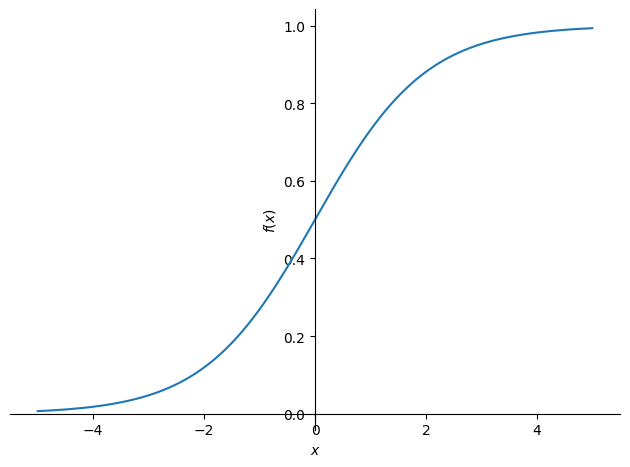

In [63]:
import sympy
from sympy.abc import x # Import the symbolic variable 'x'

sympy.plot(1/(1+sympy.exp(-x)), (x, -5, 5)); # Use symbolic expression and range

In [64]:
def calc_preds(coeffs,indeps):
  return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [65]:
coeffs=train_model(lr=100)

0.524;0.291;0.211;0.203;0.199;0.198;0.198;0.197;0.197;0.196;0.196;0.196;0.196;0.195;0.195;0.195;0.195;0.195;0.195;0.195;0.195;0.195;0.194;0.194;0.194;0.194;0.194;0.194;0.194;0.194;

In [66]:
acc(coeffs)

tensor(0.8258)

In [67]:
show_coeffs()

{'Age': tensor(-0.4786),
 'SibSp': tensor(-0.0450),
 'Parch': tensor(0.1119),
 'LogFare': tensor(-0.2008),
 'Sex_male': tensor(-10.1734),
 'Sex_female': tensor(7.9806),
 'Pclass_1': tensor(3.3944),
 'Pclass_2': tensor(2.2695),
 'Pclass_3': tensor(-6.1976),
 'Embarked_C': tensor(1.4253),
 'Embarked_Q': tensor(2.1883),
 'Embarked_S': tensor(-5.0948)}

In [68]:
tst_df=pd.read_csv('test.csv')

In [69]:
tst_df['Fare']=tst_df.Fare.fillna(0)

In [73]:
tst_df=pd.read_csv('test.csv')
tst_df['Fare']=tst_df.Fare.fillna(0)

# Preserving tst_df as a DataFrame
tst_df_processed = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

# Use the processed DataFrame for filling NaN values
tst_df_processed.fillna(modes,inplace=True)
tst_df_processed['LogFare']=np.log(tst_df_processed['Fare']+1)

# Assign the tensor to a new variable
# Change this line to ensure all columns are of numeric type:
tst_indep = tensor(tst_df_processed[indep_cols].values.astype(np.float32), dtype=torch.float32)
tst_indep = tst_indep/vals

In [74]:
tst_df['Survived']=(calc_preds(tst_indep,coeffs)>0.5).int()

In [75]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [77]:
!head sub.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


In [78]:
(val_indep*coeffs).sum(axis=1)


tensor([ 12.4232, -14.1957, -14.9584, -13.0223, -13.0142, -13.0179,   3.1973,   5.1396, -21.4831,   3.1926, -21.4795, -14.9595, -21.4766,
          3.9582, -21.4787, -11.8943, -11.8958,   5.1395, -13.0186,  -3.3258, -21.4789, -11.8951,  12.7754,   5.1356, -21.4781, -14.2018,
         -3.3224, -11.8955, -21.4788,   3.9583,   5.1466,  -3.3303, -21.4785, -21.4794,  12.4228,  -3.3265, -11.8957,  12.7765, -21.4790,
         -3.3257, -13.0127, -21.4790, -13.0122,  12.7754, -21.4787,  -3.3184, -21.4886, -21.4836, -14.1952,  -3.3243,  -4.6187, -21.4837,
        -21.4810, -21.4784, -13.0132, -13.0137, -14.1957, -21.4837, -21.4787, -21.4826,  -5.3733, -21.4785, -11.8975, -21.4787,   5.1343,
        -11.8947, -13.0141, -21.4853, -14.1978,   5.1381, -21.4790,   3.1983, -13.0136, -21.4797, -11.8926, -21.4782, -21.4790, -11.9006,
        -13.0137, -13.0165, -13.0161,  12.7747, -21.4788, -21.4785,   5.1390,  -6.4943,  -5.3800,   6.2599,  11.6560, -13.0140, -21.4797,
        -21.4790,  12.7739, -14.95

In [79]:
val_indep@coeffs


tensor([ 12.4232, -14.1957, -14.9584, -13.0223, -13.0142, -13.0179,   3.1973,   5.1396, -21.4831,   3.1926, -21.4795, -14.9595, -21.4766,
          3.9582, -21.4787, -11.8943, -11.8958,   5.1395, -13.0186,  -3.3258, -21.4789, -11.8951,  12.7754,   5.1356, -21.4780, -14.2018,
         -3.3224, -11.8955, -21.4788,   3.9583,   5.1466,  -3.3303, -21.4785, -21.4794,  12.4228,  -3.3265, -11.8957,  12.7765, -21.4790,
         -3.3257, -13.0127, -21.4790, -13.0122,  12.7754, -21.4787,  -3.3184, -21.4886, -21.4836, -14.1952,  -3.3243,  -4.6187, -21.4837,
        -21.4810, -21.4784, -13.0132, -13.0137, -14.1957, -21.4837, -21.4787, -21.4826,  -5.3733, -21.4785, -11.8975, -21.4787,   5.1343,
        -11.8947, -13.0141, -21.4853, -14.1978,   5.1381, -21.4790,   3.1983, -13.0136, -21.4797, -11.8926, -21.4782, -21.4790, -11.9006,
        -13.0137, -13.0165, -13.0161,  12.7747, -21.4788, -21.4785,   5.1390,  -6.4943,  -5.3800,   6.2599,  11.6560, -13.0140, -21.4797,
        -21.4790,  12.7739, -14.95

In [81]:
def calc_preds(coeffs, indeps):
  return torch.sigmoid(indeps@coeffs)

In [82]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [83]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [84]:
coeffs = train_model(lr=100)

0.512;0.296;0.212;0.202;0.198;0.198;0.197;0.197;0.196;0.196;0.196;0.196;0.195;0.195;0.195;0.195;0.195;0.195;0.195;0.195;0.194;0.194;0.194;0.194;0.194;0.194;0.194;0.194;0.194;0.194;

In [85]:
acc(coeffs)

tensor(0.8258)

In [86]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [87]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [88]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [89]:
coeffs = train_model(lr=1.4)

0.544;0.533;0.521;0.507;0.491;0.470;0.445;0.416;0.384;0.352;0.325;0.304;0.288;0.275;0.265;0.256;0.250;0.245;0.240;0.237;0.234;0.231;0.229;0.227;0.226;0.225;0.223;0.222;0.221;0.220;

In [90]:
coeffs = train_model(lr=20)

0.544;0.416;0.256;0.311;0.212;0.200;0.198;0.197;0.196;0.195;0.194;0.194;0.194;0.193;0.193;0.193;0.193;0.193;0.193;0.193;0.193;0.193;0.193;0.193;0.193;0.193;0.193;0.193;0.193;0.193;

In [91]:
acc(coeffs)

tensor(0.8258)

In [92]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [93]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [94]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [95]:
coeffs = train_model(lr=4)

0.526;0.483;0.464;0.378;0.373;0.361;0.346;0.356;0.304;0.214;0.209;0.207;0.210;0.202;0.203;0.202;0.204;0.198;0.196;0.195;0.195;0.194;0.194;0.194;0.194;0.194;0.194;0.194;0.193;0.193;

In [96]:
acc(coeffs)

tensor(0.8258)